In [3]:
import pandas as pd
import collections
import matplotlib.pyplot as plt

# Análise de Keywords

In [4]:
acm = pd.read_csv("acmdl.csv")
ieee = pd.read_csv("ieee.csv", ";", error_bad_lines=False)
elsevier = pd.read_csv("elsevier.csv")
springer = pd.read_csv("newSpringer.csv")

b'Skipping line 249: expected 26 fields, saw 27\nSkipping line 290: expected 26 fields, saw 27\nSkipping line 302: expected 26 fields, saw 28\nSkipping line 317: expected 26 fields, saw 27\nSkipping line 501: expected 26 fields, saw 27\nSkipping line 729: expected 26 fields, saw 27\nSkipping line 730: expected 26 fields, saw 28\nSkipping line 882: expected 26 fields, saw 31\nSkipping line 967: expected 26 fields, saw 27\nSkipping line 983: expected 26 fields, saw 27\nSkipping line 1211: expected 26 fields, saw 27\nSkipping line 1212: expected 26 fields, saw 28\nSkipping line 1364: expected 26 fields, saw 31\nSkipping line 1449: expected 26 fields, saw 27\nSkipping line 1518: expected 26 fields, saw 28\nSkipping line 1574: expected 26 fields, saw 29\nSkipping line 1629: expected 26 fields, saw 29\nSkipping line 1662: expected 26 fields, saw 27\nSkipping line 1712: expected 26 fields, saw 28\nSkipping line 1765: expected 26 fields, saw 32\nSkipping line 1843: expected 26 fields, saw 27\n

In [76]:
#Por criação de dicionário
#counting = {}
#for i in searchResult.keywords:
#    keywordsFound = str(i).split(",")
#    for word in keywordsFound:
#        wordUpper = word.upper()
#        if wordUpper in counting:
#            counting[wordUpper] = counting[wordUpper]+1
#        else:
#            counting[wordUpper] = 1

#data1 = pd.DataFrame.from_dict(counting,orient='index')
#data1

In [107]:
# Por criação de Series acm
acmDataSeries = pd.Series([])
x =  0
for i in acm.keywords:
    x = x + 1
    keywordsFound = str(i).upper().split(",")
    newKeywords = []
    for key in keywordsFound:
        key = key.strip()
        if (key.lower() == "iot" or key.lower() == "internet of things (iot)"):
            newKeywords.append("INTERNET OF THINGS")
        elif (key.lower() == "smart city" or key.lower() == "smart cities"):
            newKeywords.append("SMART CITIES")
        elif (key.lower() == "cloud" or key.lower() == "cloud computing"):
            newKeywords.append("CLOUD COMPUTING")
        elif (key.lower() == "context" or key.lower() == "context aware" or
              key.lower() == "context-aware" or key.lower() == "context-awareness" or
              key.lower() == "context awareness" or key.lower() == "context aware computing"
              or key.lower() == "context-aware computing"):
            newKeywords.append("CONTEXT-AWARENESS")
        elif (key.lower() == "mobile" or key.lower() == "mobile computing" or
              key.lower() == "mobile application" or key.lower() == "mobile sensing" or
              key.lower() == "smartphone" or key.lower() == "mobile devices" or
              key.lower() == "smartphones" or key.lower() == "android" or
              key.lower() == "wearable" or key.lower() == "wearables" or 
              key.lower() == "wearable device" or key.lower() == "wearable computing"):
            newKeywords.append("MOBILE COMPUTING")
        elif (key.lower() == "wireless sensor network" or key.lower() == "wireless sensor networks"
              or key.lower() == "sensor" or key.lower() == "sensors"):
            newKeywords.append("WIRELESS SENSOR NETWORKING")
        elif (key != "UBIQUITOUS COMPUTING" and key != "PERVASIVE COMPUTING" and key != "UBIQUITOUS"):
            newKeywords.append(key)
    acmDataSeries = acmDataSeries.append(pd.Series(newKeywords),ignore_index=True)
    if (x == 1000):
        break
    
acmData = acmDataSeries.value_counts().to_frame()
acmData = acmData.drop("NAN")
acmData.head()

,0
MOBILE COMPUTING,146
INTERNET OF THINGS,57
ACTIVITY RECOGNITION,37
CONTEXT-AWARENESS,34
WIRELESS SENSOR NETWORKING,30


In [108]:
acmBig = acmData.nlargest(50,0)
acmBig

,0
MOBILE COMPUTING,146
INTERNET OF THINGS,57
ACTIVITY RECOGNITION,37
CONTEXT-AWARENESS,34
WIRELESS SENSOR NETWORKING,30
SMART CITIES,24
PRIVACY,23
MACHINE LEARNING,23
SMART HOME,19
AUGMENTED REALITY,18


In [109]:
# Por criação de Series elsevier
elsevierDataSeries = pd.Series([])
x =  0
for i in elsevier.keywords:
    x = x + 1
    keywordsFound = str(i).upper().split(",")
    newKeywords = []
    for key in keywordsFound:
        key = key.strip()
        if (key.lower() == "iot" or key.lower() == "internet of things (iot)"):
            newKeywords.append("INTERNET OF THINGS")
        elif (key.lower() == "smart city" or key.lower() == "smart cities"):
            newKeywords.append("SMART CITIES")
        elif (key.lower() == "cloud" or key.lower() == "cloud computing"):
            newKeywords.append("CLOUD COMPUTING")
        elif (key.lower() == "context" or key.lower() == "context aware" or
              key.lower() == "context-aware" or key.lower() == "context-awareness" or
              key.lower() == "context awareness" or key.lower() == "context aware computing"
              or key.lower() == "context-aware computing"):
            newKeywords.append("CONTEXT-AWARENESS")
        elif (key.lower() == "mobile" or key.lower() == "mobile computing" or
              key.lower() == "mobile application" or key.lower() == "mobile sensing" or
              key.lower() == "smartphone" or key.lower() == "mobile devices" or
              key.lower() == "smartphones" or key.lower() == "android" or
              key.lower() == "wearable" or key.lower() == "wearables" or 
              key.lower() == "wearable device" or key.lower() == "wearable computing"):
            newKeywords.append("MOBILE COMPUTING")
        elif (key.lower() == "wireless sensor network" or key.lower() == "wireless sensor networks"
              or key.lower() == "sensor" or key.lower() == "sensors"):
            newKeywords.append("WIRELESS SENSOR NETWORKING")
        elif (key != "UBIQUITOUS COMPUTING" and key != "PERVASIVE COMPUTING" and key != "UBIQUITOUS"):
            newKeywords.append(key)
    elsevierDataSeries = elsevierDataSeries.append(pd.Series(newKeywords),ignore_index=True)
    if (x == 1000):
        break
    
elsevierData = elsevierDataSeries.value_counts().to_frame()
elsevierData = elsevierData.drop("NAN")
elsevierData.head()

,0
INTERNET OF THINGS,132
CONTEXT-AWARENESS,61
MOBILE COMPUTING,60
CLOUD COMPUTING,43
SMART CITIES,34


In [110]:
elsevierBig = elsevierData.nlargest(50,0)
elsevierBig

,0
INTERNET OF THINGS,132
CONTEXT-AWARENESS,61
MOBILE COMPUTING,60
CLOUD COMPUTING,43
SMART CITIES,34
WIRELESS SENSOR NETWORKING,34
SECURITY,31
MACHINE LEARNING,27
BIG DATA,22
ONTOLOGY,20


In [111]:
# Por criação de Series springer
springerDataSeries = pd.Series([])
x =  0
for i in springer.keywords:
    x = x + 1
    keywordsFound = str(i).upper().split(",")
    newKeywords = []
    for key in keywordsFound:
        key = key.strip()
        if (key.lower() == "iot" or key.lower() == "internet of things (iot)"):
            newKeywords.append("INTERNET OF THINGS")
        elif (key.lower() == "smart city" or key.lower() == "smart cities"):
            newKeywords.append("SMART CITIES")
        elif (key.lower() == "cloud" or key.lower() == "cloud computing"):
            newKeywords.append("CLOUD COMPUTING")
        elif (key.lower() == "context" or key.lower() == "context aware" or
              key.lower() == "context-aware" or key.lower() == "context-awareness" or
              key.lower() == "context awareness" or key.lower() == "context aware computing"
              or key.lower() == "context-aware computing"):
            newKeywords.append("CONTEXT-AWARENESS")
        elif (key.lower() == "mobile" or key.lower() == "mobile computing" or
              key.lower() == "mobile application" or key.lower() == "mobile sensing" or
              key.lower() == "smartphone" or key.lower() == "mobile devices" or
              key.lower() == "smartphones" or key.lower() == "android" or
              key.lower() == "wearable" or key.lower() == "wearables" or 
              key.lower() == "wearable device" or key.lower() == "wearable computing"):
            newKeywords.append("MOBILE COMPUTING")
        elif (key.lower() == "wireless sensor network" or key.lower() == "wireless sensor networks"
              or key.lower() == "sensor" or key.lower() == "sensors"):
            newKeywords.append("WIRELESS SENSOR NETWORKING")
        elif (key != "UBIQUITOUS COMPUTING" and key != "PERVASIVE COMPUTING" and key != "UBIQUITOUS"):
            newKeywords.append(key)
    springerDataSeries = springerDataSeries.append(pd.Series(newKeywords),ignore_index=True)
    if (x == 1000):
        break
    
springerData = springerDataSeries.value_counts().to_frame()
springerData = springerData.drop("NAN")
springerData.head()

,0
CLOUD COMPUTING,148
INTERNET OF THINGS,84
MOBILE COMPUTING,81
CONTEXT-AWARENESS,50
WIRELESS SENSOR NETWORKING,29


In [112]:
springerBig = springerData.nlargest(50,0)
springerBig

,0
CLOUD COMPUTING,148
INTERNET OF THINGS,84
MOBILE COMPUTING,81
CONTEXT-AWARENESS,50
WIRELESS SENSOR NETWORKING,29
SMART CITIES,26
AMBIENT INTELLIGENCE,21
SECURITY,19
BIG DATA,19
PRIVACY,16


In [113]:
# Por criação de Series ieee
ieeeDataSeries = pd.Series([])
x =  0
for i in ieee.keywords:
    x = x + 1
    keywordsFound = str(i).upper().split(",")
    newKeywords = []
    for key in keywordsFound:
        key = key.strip()
        if (key.lower() == "iot" or key.lower() == "internet of things (iot)"):
            newKeywords.append("INTERNET OF THINGS")
        elif (key.lower() == "smart city" or key.lower() == "smart cities"):
            newKeywords.append("SMART CITIES")
        elif (key.lower() == "cloud" or key.lower() == "cloud computing"):
            newKeywords.append("CLOUD COMPUTING")
        elif (key.lower() == "context" or key.lower() == "context aware" or
              key.lower() == "context-aware" or key.lower() == "context-awareness" or
              key.lower() == "context awareness" or key.lower() == "context aware computing"
              or key.lower() == "context-aware computing"):
            newKeywords.append("CONTEXT-AWARENESS")
        elif (key.lower() == "mobile" or key.lower() == "mobile computing" or
              key.lower() == "mobile application" or key.lower() == "mobile sensing" or
              key.lower() == "smartphone" or key.lower() == "mobile devices" or
              key.lower() == "smartphones" or key.lower() == "android" or
              key.lower() == "wearable" or key.lower() == "wearables" or 
              key.lower() == "wearable device" or key.lower() == "wearable computing"):
            newKeywords.append("MOBILE COMPUTING")
        elif (key.lower() == "wireless sensor network" or key.lower() == "wireless sensor networks"
              or key.lower() == "sensor" or key.lower() == "sensors"):
            newKeywords.append("WIRELESS SENSOR NETWORKING")
        elif (key != "UBIQUITOUS COMPUTING" and key != "PERVASIVE COMPUTING" and key != "UBIQUITOUS"):
            newKeywords.append(key)
    ieeeDataSeries = ieeeDataSeries.append(pd.Series(newKeywords),ignore_index=True)
    if (x == 1000):
        break
ieeeData = ieeeDataSeries.value_counts().to_frame()
ieeeData = ieeeData.drop("NAN")
ieeeData.head()

,0
CLOUD COMPUTING,168
INTERNET OF THINGS,83
MOBILE COMPUTING,71
FOG COMPUTING,43
CONTEXT-AWARENESS,40


In [114]:
ieeeBig = ieeeData.nlargest(50,0)
ieeeBig

,0
CLOUD COMPUTING,168
INTERNET OF THINGS,83
MOBILE COMPUTING,71
FOG COMPUTING,43
CONTEXT-AWARENESS,40
EDGE COMPUTING,40
SECURITY,39
WIRELESS SENSOR NETWORKING,30
BIG DATA,28
PRIVACY,27


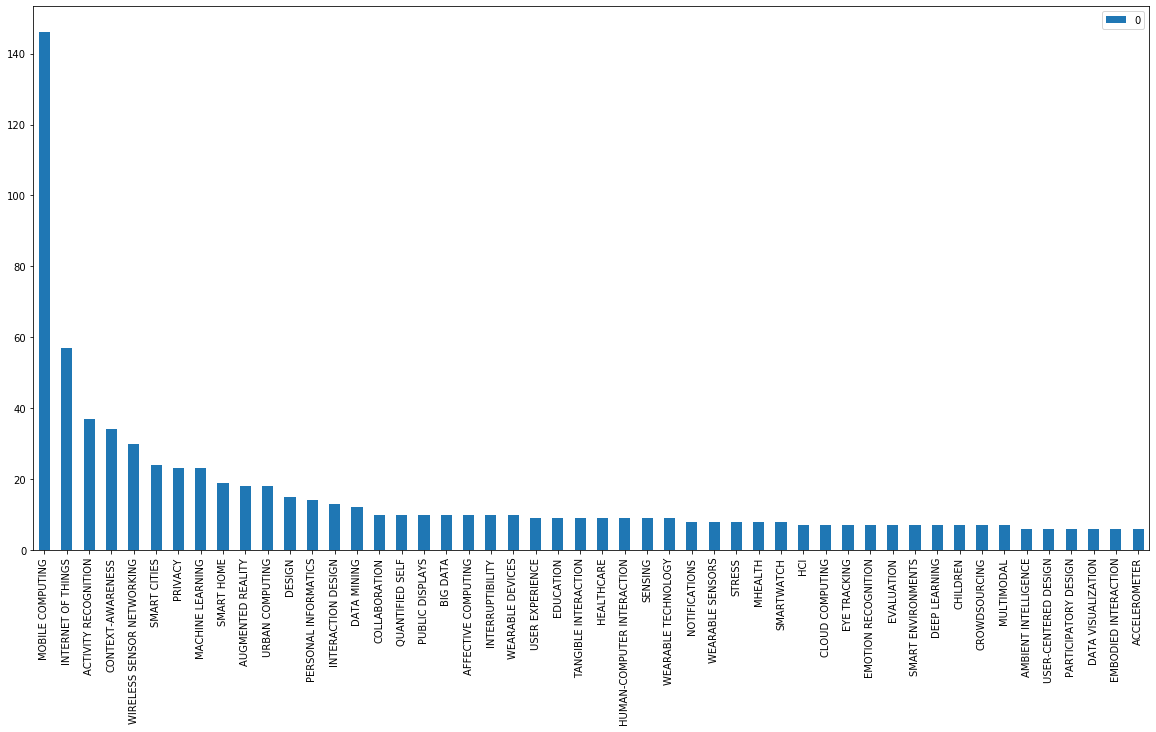

In [115]:
acmBig.plot.bar(figsize=(20,10))

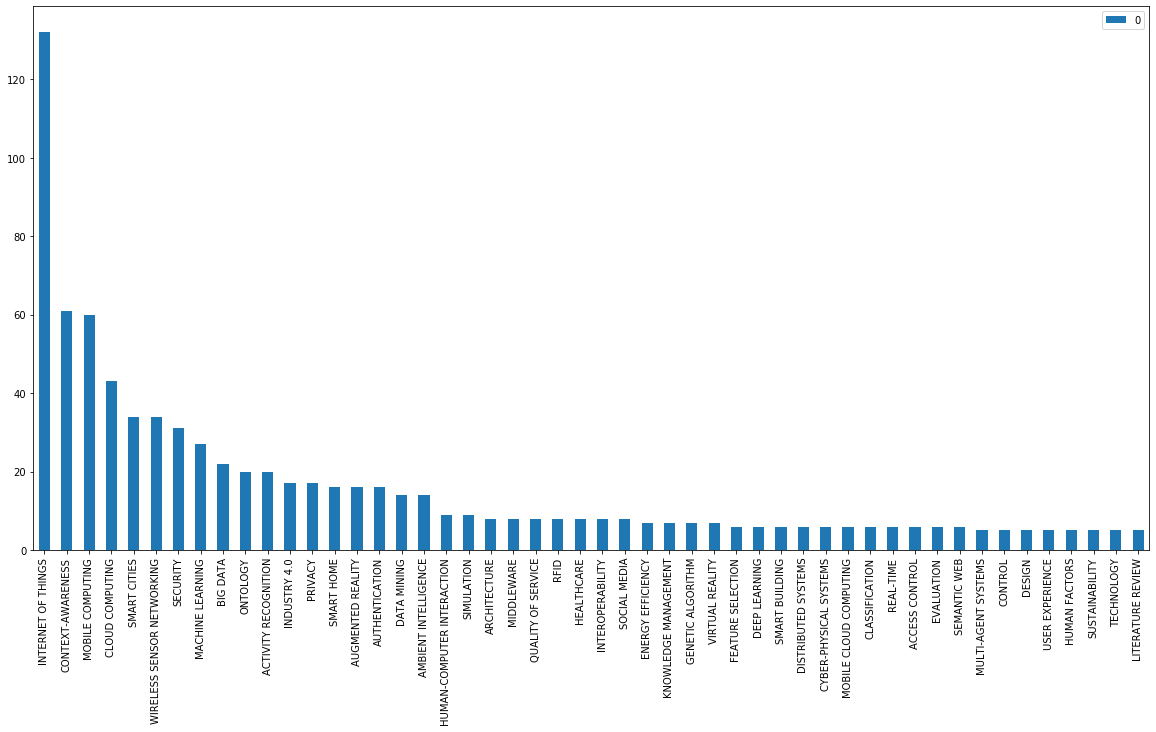

In [116]:
elsevierBig.plot.bar(figsize=(20,10))

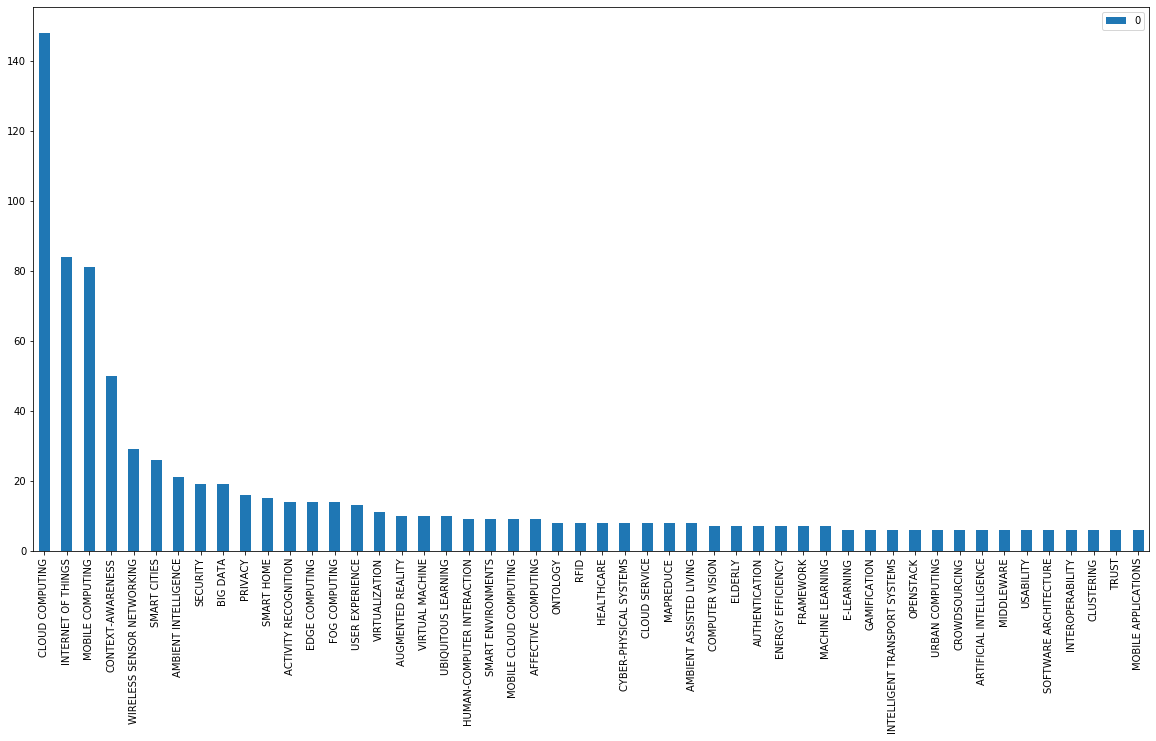

In [117]:
springerBig.plot.bar(figsize=(20,10))

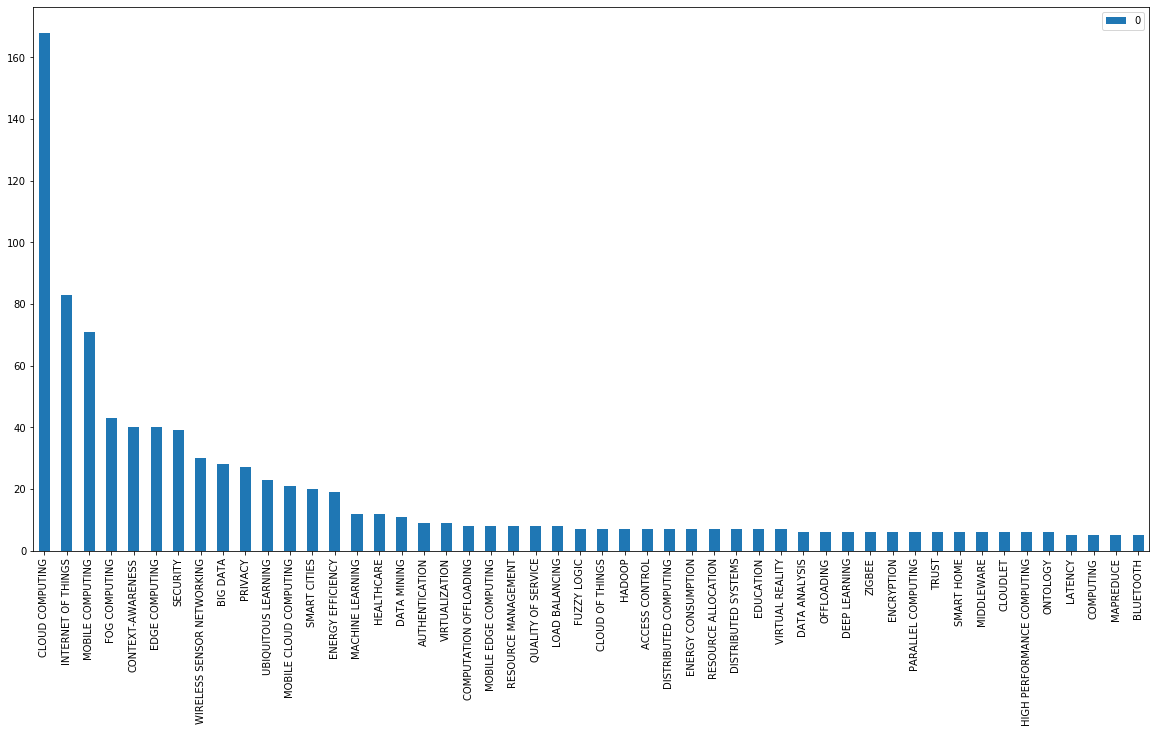

In [118]:
ieeeBig.plot.bar(figsize=(20,10))

In [119]:
ieeeAcmDataSeries = ieeeDataSeries.append(acmDataSeries,ignore_index=True)
ieeeAcmSpringerDataSeries = ieeeAcmDataSeries.append(springerDataSeries,ignore_index=True)
ieeeAcmSpringerElsevierDataSeries = ieeeAcmSpringerDataSeries.append(elsevierDataSeries,ignore_index=True)
totalData = ieeeAcmSpringerElsevierDataSeries.value_counts().to_frame()
totalData = totalData.drop("NAN")
totalData.head()

,0
CLOUD COMPUTING,366
MOBILE COMPUTING,358
INTERNET OF THINGS,356
CONTEXT-AWARENESS,185
WIRELESS SENSOR NETWORKING,123


In [120]:
totalBig = totalData.nlargest(50,0)
totalBig

,0
CLOUD COMPUTING,366
MOBILE COMPUTING,358
INTERNET OF THINGS,356
CONTEXT-AWARENESS,185
WIRELESS SENSOR NETWORKING,123
SMART CITIES,104
SECURITY,93
PRIVACY,83
BIG DATA,79
ACTIVITY RECOGNITION,75


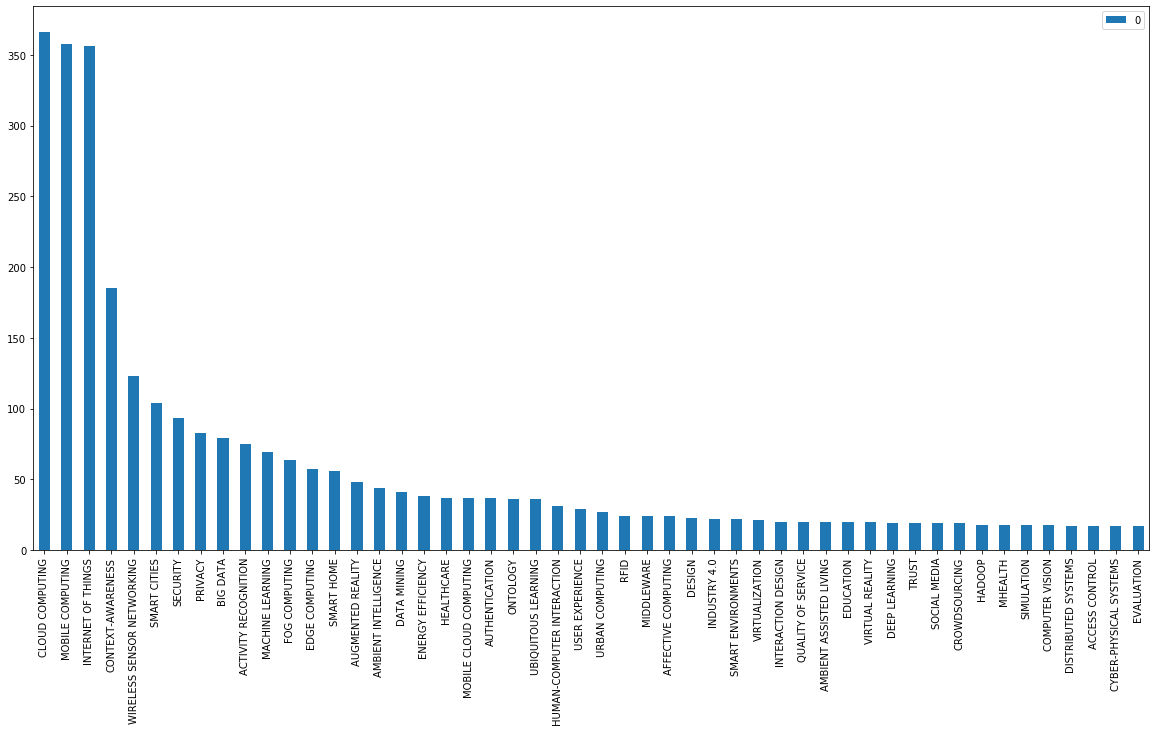

In [121]:
totalBig.plot.bar(figsize=(20,10))

## Análise na IEEE 

## Análise na Elsevier

## Análise na Springer 